In [1]:
##EDA Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import scipy


import util_diagnostic
import util_visualization
import util_preprocessing
import util_calculation
import util_modelling

def reload():
    importlib.reload(util_diagnostic)
    importlib.reload(util_visualization)
    importlib.reload(util_preprocessing)
    importlib.reload(util_calculation)
    importlib.reload(util_modelling)
file_name = "House_Rent_Dataset.csv"
df = pd.read_csv(file_name)
columns = df.columns
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
reload()
util_diagnostic.getTotalUniqueColumns(df, df.columns, False)

Column : Posted On, unique: 81, dtype: object
Column : BHK, unique: 6, dtype: int64
Column : Rent, unique: 243, dtype: int64
Column : Size, unique: 615, dtype: int64
Column : Floor, unique: 480, dtype: object
Column : Area Type, unique: 3, dtype: object
Column : Area Locality, unique: 2235, dtype: object
Column : City, unique: 6, dtype: object
Column : Furnishing Status, unique: 3, dtype: object
Column : Tenant Preferred, unique: 3, dtype: object
Column : Bathroom, unique: 8, dtype: int64
Column : Point of Contact, unique: 3, dtype: object


In [3]:
pd.DataFrame(df.value_counts())

0
Posted On  BHK Rent   Size Floor           Area Type   Area Locality                 City      Furnishing Status Tenant Preferred Bathroom Point of Contact   
2022-04-13 3   260000 1800 10 out of 11    Carpet Area JVPD Scheme                   Mumbai    Furnished         Family           4        Contact Agent     1
2022-06-22 3   17000  1200 Ground out of 2 Super Area  Selaiyur                      Chennai   Unfurnished       Bachelors/Family 3        Contact Owner     1
               15000  2200 1 out of 2      Super Area  Irumbuliyur                   Chennai   Unfurnished       Bachelors        3        Contact Owner     1
                      1850 1 out of 1      Super Area  Tarapuri Colony, Secunderabad Hyderabad Semi-Furnished    Bachelors/Family 2        Contact Owner     1
               13000  900  1 out of 4      Super Area  Perambur                      Chennai   Unfurnished       Bachelors/Family 1        Contact Owner     1
...                                                                                                                                                         ..
2022-05-26 4   37000  2700 2 out of 3      Carpet Area AGCR Enclave, Anand Vihar     Delhi     Semi-Furnished    Bachelors/Family 4        Contact Agent     1
           3   80000  2000 3 out of 4      Carpet Area Sarvodaya Enclave             Delhi     Unfurnished       Bachelors/Family 3        Contact Agent     1
               69999  950  7 out of 12     Carpet Area Chembur East                  Mumbai    Unfurnished       Family           3        Contact Agent     1
               37000  1800 1 out of 4      Carpet Area Preet Vihar                   Delhi     Semi-Furnished    Bachelors/Family 3        Contact Agent     1
2022-07-11 2   12000  550  Ground out of 1 Super Area  Choolaimedu                   Chennai   Unfurnished       Bachelors/Family 2        Contact Owner     1

[4746 rows x 1 columns]

Correlation Matrix for pearson


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for pearson'}>

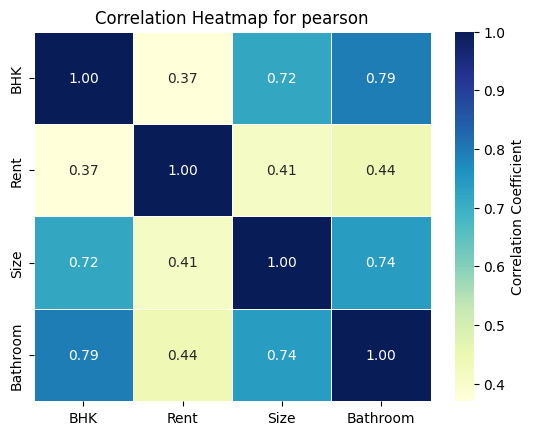

Correlation Matrix for kendall


,BHK,Rent,Size,Bathroom
BHK,1.000000,0.463569,0.641836,0.754982
Rent,0.463569,1.000000,0.380716,0.548034
Size,0.641836,0.380716,1.000000,0.606463
Bathroom,0.754982,0.548034,0.606463,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for kendall'}>

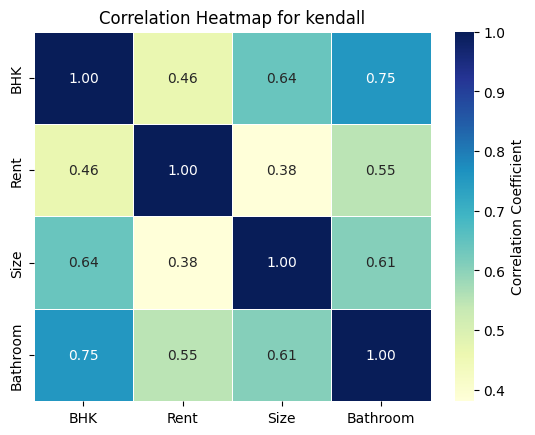

Correlation Matrix for spearman


,BHK,Rent,Size,Bathroom
BHK,1.000000,0.568416,0.755146,0.790580
Rent,0.568416,1.000000,0.521420,0.662961
Size,0.755146,0.521420,1.000000,0.722133
Bathroom,0.790580,0.662961,0.722133,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for spearman'}>

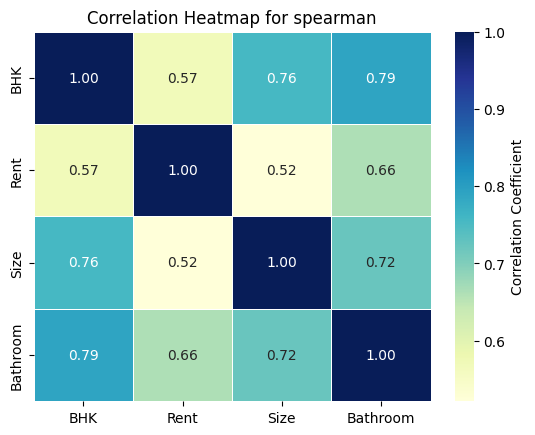

In [4]:
reload()
util_calculation.calculateCorrelationNumeric(df)


Correlation Matrix for phi_k


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,1.000000,0.197162,0.140325,0.226954,0.484990,0.670580,0.206793,0.319961,0.253249,0.566340
BHK,0.197162,1.000000,0.295008,0.671970,0.294199,0.237055,0.300481,0.212961,0.781233,0.445467
Rent,0.140325,0.295008,1.000000,0.862255,0.059644,0.071189,0.036691,0.016315,0.300761,0.085540
Size,0.226954,0.671970,0.862255,1.000000,0.087740,0.217216,0.253026,0.131413,0.788165,0.257903
Area Type,0.484990,0.294199,0.059644,0.087740,1.000000,0.566124,0.132222,0.587668,0.208129,0.740210
City,0.670580,0.237055,0.071189,0.217216,0.566124,1.000000,0.416639,0.347694,0.270873,0.707368
Furnishing Status,0.206793,0.300481,0.036691,0.253026,0.132222,0.416639,1.000000,0.235885,0.228814,0.277654
Tenant Preferred,0.319961,0.212961,0.016315,0.131413,0.587668,0.347694,0.235885,1.000000,0.176242,0.470243
Bathroom,0.253249,0.781233,0.300761,0.788165,0.208129,0.270873,0.228814,0.176242,1.000000,0.364680
Point of Contact,0.566340,0.445467,0.085540,0.257903,0.740210,0.707368,0.277654,0.470243,0.364680,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for phi_k'}>

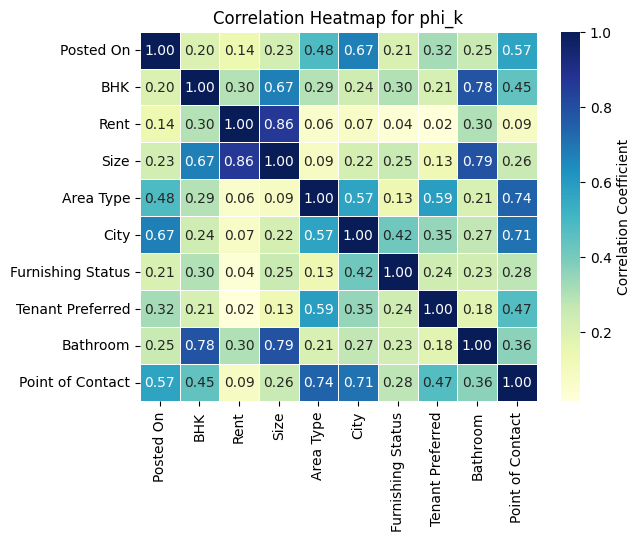

In [5]:
reload()
util_calculation.calculateCorrelationMix(df)

In [6]:
#drop built area
df = df[df['Point of Contact'] != 'Contact Builder']
df['Point of Contact'].value_counts()


Contact Owner    3216
Contact Agent    1529
Name: Point of Contact, dtype: int64

In [7]:

x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [8]:
reload()
cat_col=util_preprocessing.getOnlyColmnsWithType(x, 'object')
x,dictEncoder=util_preprocessing.encodeCategoricalColumn(x,cat_col)
x

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,455,2,221,4,2,1,2
1,2,20000,800,14,2,1527,4,1,1,1
2,2,17000,1000,14,2,1760,4,1,1,1
3,2,10000,800,10,2,526,4,2,1,1
4,2,7500,850,10,1,1890,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,271,1,219,3,1,1,2
4742,3,29000,2000,16,2,1214,3,1,1,3
4743,3,35000,1750,271,1,724,3,1,1,3
4744,3,45000,1500,226,1,590,3,1,2,2


In [9]:
y

0       Contact Owner
1       Contact Owner
2       Contact Owner
3       Contact Owner
4       Contact Owner
            ...      
4741    Contact Owner
4742    Contact Owner
4743    Contact Agent
4744    Contact Agent
4745    Contact Owner
Name: Point of Contact, Length: 4745, dtype: object

In [10]:
len(y.shape)

1

In [11]:
reload()
y,dictEncoder=util_preprocessing.encodeCategoricalColumn(y,)


In [12]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [13]:
reload()
num_col=util_preprocessing.getOnlyColmnsWithType(x, "number")
x[num_col],scaler=util_preprocessing.normalizeNumericColumn(x,num_col)
x

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,-0.101055,-0.320077,0.208768,1.384385,0.969079,-1.375033,0.863431,1.111836,0.145550,0.038365
1,-0.101055,-0.192044,-0.264308,-1.325013,0.969079,0.687688,0.863431,-0.349162,0.145550,-1.092319
2,-0.101055,-0.230454,0.051076,-1.325013,0.969079,1.055692,0.863431,-0.349162,0.145550,-1.092319
3,-0.101055,-0.320077,-0.264308,-1.349588,0.969079,-0.893310,0.863431,1.111836,0.145550,-1.092319
4,-0.101055,-0.352085,-0.185462,-1.349588,-1.028436,1.261017,0.863431,1.111836,-1.783595,-1.092319
...,...,...,...,...,...,...,...,...,...,...
4741,-0.101055,-0.256061,0.051076,0.253933,-1.028436,-1.378192,0.303887,-0.349162,0.145550,0.038365
4742,1.100713,-0.076815,1.627993,-1.312725,0.969079,0.193330,0.303887,-0.349162,0.145550,1.169048
4743,1.100713,0.000004,1.233764,0.253933,-1.028436,-0.580585,0.303887,-0.349162,0.145550,1.169048
4744,1.100713,0.128037,0.839534,-0.022536,-1.028436,-0.792227,0.303887,-0.349162,2.074694,0.038365


In [14]:
reload()
model=util_modelling.prepareKNN()

In [15]:
model2=util_modelling.prepareSVM()

In [17]:
reload(	)
list_model=[model,model2]
util_modelling.getStratifedKFoldScore(list_model,x.values,y)

d:\tools\miniconda\envs\lombaDAC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\tools\miniconda\envs\lombaDAC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

,model_name,accuracy,recall,precision,f1
0,KNeighborsClassifier,0.852692,0.887138,0.894768,0.890853
1,SVC,0.876712,0.941226,0.884612,0.911937
